<ipython-input-29-821867f3ef45>:25: RuntimeWarning: overflow encountered in ubyte_scalars
  if imgf[i,j]- img1[i,j] >0:
<ipython-input-29-821867f3ef45>:26: RuntimeWarning: overflow encountered in ubyte_scalars
  final[i,j] = imgf[i,j]- img1[i,j]


28


<ipython-input-29-821867f3ef45>:53: RuntimeWarning: overflow encountered in ubyte_scalars
  if imgf[i,j]- img1[i,j] >T:


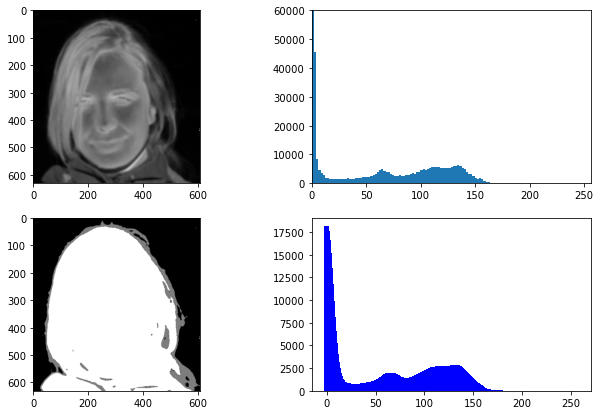

In [29]:

import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import gaussian_filter
from scipy.ndimage import gaussian_filter1d
import os
def Hist(img):
   row, col = img.shape 
   y = np.zeros(256)
   for i in range(0,row):
      for j in range(0,col):
         num = int(img[i,j])
         y[num] += 1
   x = np.arange(0,256)
#    plt.bar(x, y, color='b', width=5, align='center')
#    plt.show()
   return y
img1 = cv2.imread("../data/noflash2.png",0)
imgf =  cv2.imread("../data/flash2.png",0)
img1 = gaussian_filter(img1, sigma=3)
imgf = gaussian_filter(imgf, sigma=3)
final = np.zeros(img1.shape)
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        if imgf[i,j]- img1[i,j] >0:
            final[i,j] = imgf[i,j]- img1[i,j]
        else : 
             final[i,j] = 0

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(11, 7))                
weightList=final.flatten()
weightList.sort()
ax2.hist(weightList, bins=128) 
ax2.axis([0, 256,0,60000])
ax1.imshow(final,cmap="gray")
T = 0
weightList = Hist(final)
weightList = gaussian_filter1d(weightList,sigma= 5)
for i in range(2,255) : 
    
    
    if weightList[i] > weightList[i+1]:

        for j in range(i+1,255):
            if  weightList[j] < weightList[j+1]:
                T = j
                break
        break
print(T)
# T= 30
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        if imgf[i,j]- img1[i,j] >T:
            final[i,j] = 255
        elif imgf[i,j]- img1[i,j] <T and imgf[i,j]- img1[i,j] > 0.2*T:
            final[i,j] = 125
        else : 
             final[i,j] = 0
x = np.arange(0,256)
ax4.bar(x, weightList, color='b', width=5, align='center')

ax3.imshow(final,cmap="gray")
# os.chdir("../data_3//")
# cv2.imwrite("trimap2.png",final)